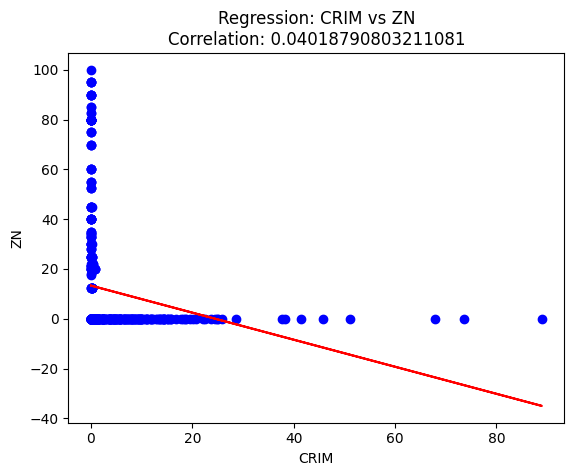

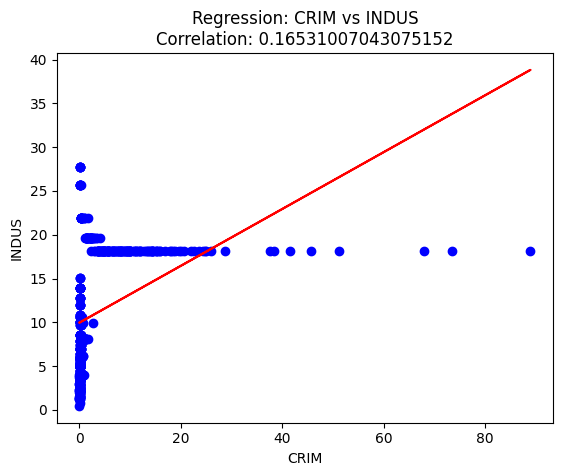

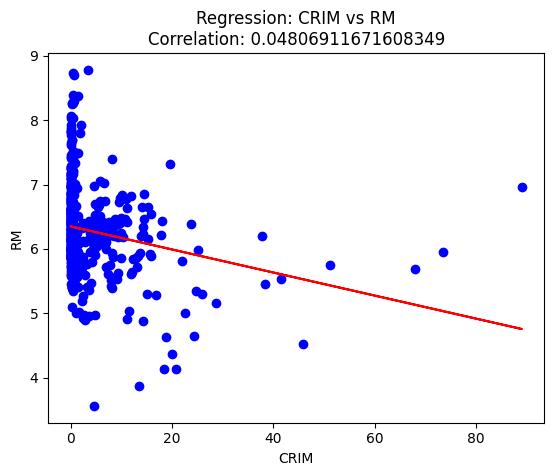

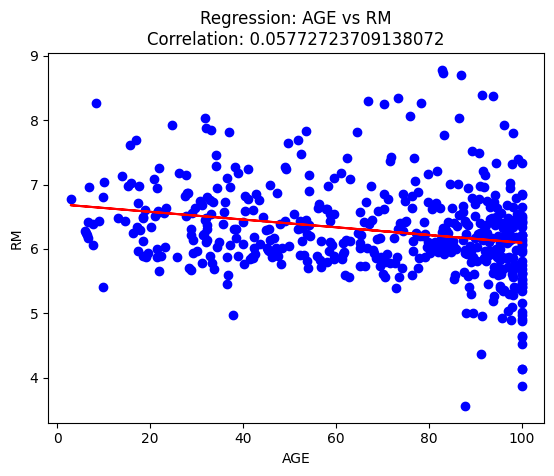

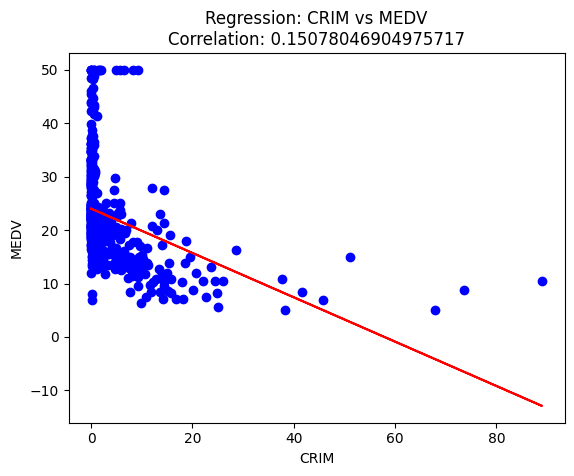

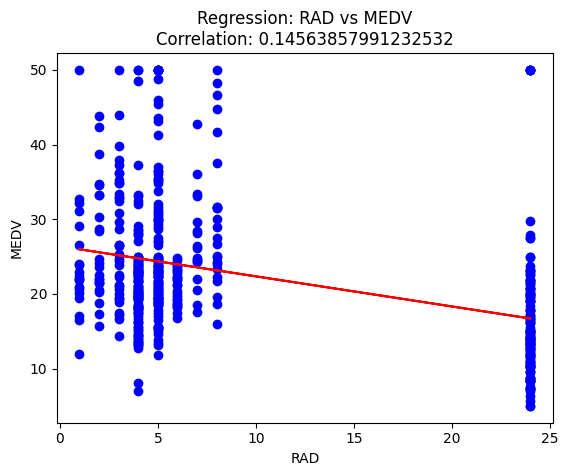

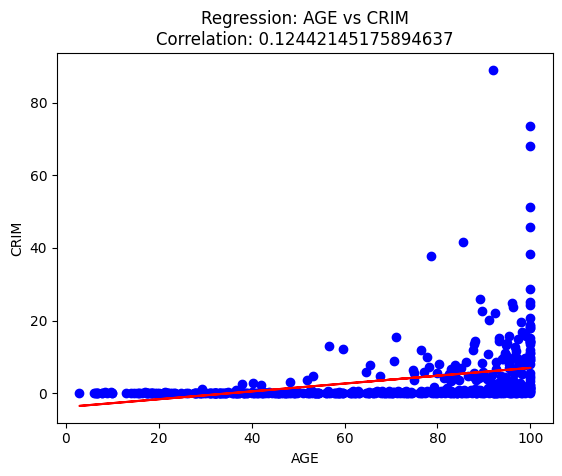

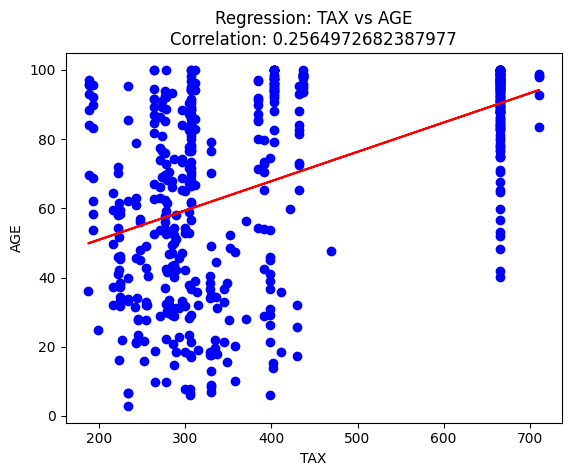

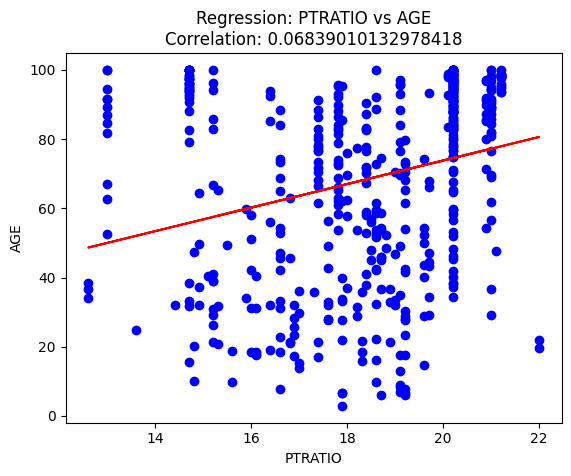

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import requests

url = 'https://raw.githubusercontent.com/scikit-learn/scikit-learn/main/sklearn/datasets/data/boston_house_prices.csv'
response = requests.get(url)
data = pd.read_csv(response.url, skiprows=[0])

pairs = [
    ('CRIM', 'ZN'),
    ('CRIM', 'INDUS'),
    ('CRIM', 'RM'),
    ('AGE', 'RM'),
    ('CRIM', 'MEDV'),
    ('RAD', 'MEDV'),
    ('AGE', 'CRIM'),
    ('TAX', 'AGE'),
    ('PTRATIO', 'AGE'),
]

for pair in pairs:
    x_label, y_label = pair
    x = data[x_label].astype(float).values.reshape(-1, 1)
    y = data[y_label].astype(float).values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(x, y)

    correlation = model.score(x, y)

    plt.scatter(x, y, color='blue')
    plt.plot(x, model.predict(x), color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Regression: {x_label} vs {y_label}\nCorrelation: {correlation}')
    plt.show()